<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/practice_week_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def calculate_percentiles(data, percentiles):
    results = {'Nearest': {}, 'Higher': {}, 'Lower': {}, 'Standard': {}}
    for p in percentiles:
        results['Nearest'][p] = np.percentile(data, p, method='nearest')
        results['Higher'][p] = np.percentile(data, p, method='higher')
        results['Lower'][p] = np.percentile(data, p, method='lower')
        results['Standard'][p] = np.percentile(data, p, method='linear')

    return results

data = [10, 20, 30, 40, 50, 100]
percentiles = [25, 50, 75]
results = calculate_percentiles(data, percentiles)
for method, percentile_values in results.items():
    print(f'{method}:')
    for p, value in percentile_values.items():
        print(f'\t{p}th Percentile: {value}')

Nearest:
	25th Percentile: 20
	50th Percentile: 30
	75th Percentile: 50
Higher:
	25th Percentile: 30
	50th Percentile: 40
	75th Percentile: 50
Lower:
	25th Percentile: 20
	50th Percentile: 30
	75th Percentile: 40
Standard:
	25th Percentile: 22.5
	50th Percentile: 35.0
	75th Percentile: 47.5


In [2]:
from sklearn import datasets

# load data
digits = datasets.load_digits()

# check 1st sample with its label
print('1st sample\n', digits.images[0], '\n')
print('It\'s label:', digits.target[0])

1st sample
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

It's label: 0


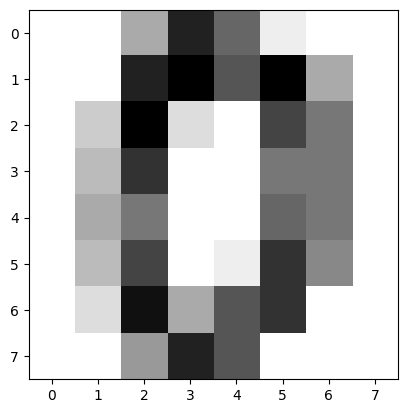

In [3]:
import matplotlib.pyplot as plt

# visualization of 1st sameple
plt.imshow(digits.images[0], cmap='binary')
plt.show()

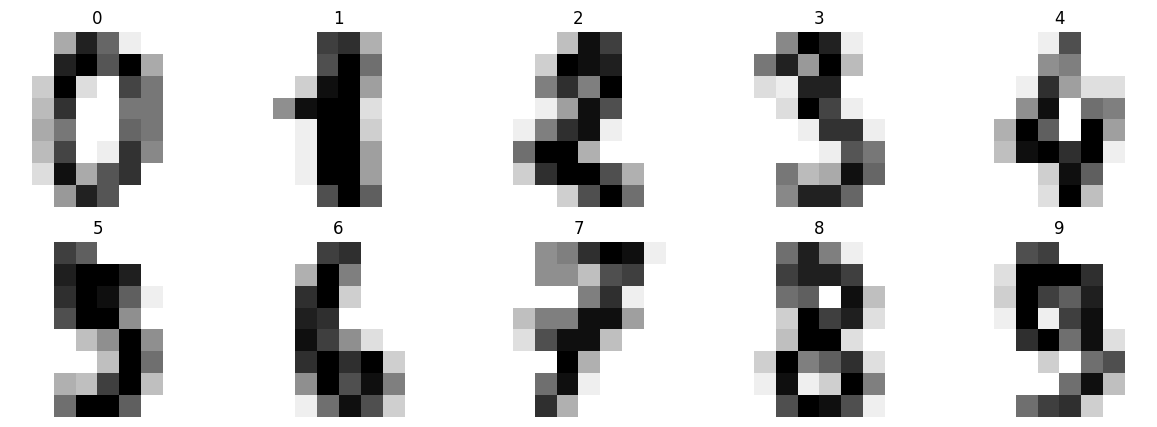

In [4]:
# visualization of first 10 samples with labels
fig = plt.figure(figsize=(15, 5))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='binary')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()

In [5]:
from sklearn.neural_network import MLPClassifier

# neural network (hyperparameters) design
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic',
                    solver='sgd',
                    learning_rate_init=.1,
                    verbose=True)

In [6]:
# dimension adjustment
X = digits.images.reshape((len(digits.images),
                           digits.images.shape[1]*digits.images.shape[2]))
print('1st sample in vector form:', X[0], '\n')

y = digits.target
print('Its label:', y[0])

1st sample in vector form: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

Its label: 0


In [7]:
# training data
X_train = X[:1000]
y_train = y[:1000]

# test data
X_test = X[1000:]
y_test = y[1000:]

In [8]:
# train neural network
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.20994620
Iteration 2, loss = 1.85976841
Iteration 3, loss = 1.52719431
Iteration 4, loss = 1.21400335
Iteration 5, loss = 0.94396486
Iteration 6, loss = 0.73098336
Iteration 7, loss = 0.57016241
Iteration 8, loss = 0.45420319
Iteration 9, loss = 0.38402916
Iteration 10, loss = 0.31348176
Iteration 11, loss = 0.27383438
Iteration 12, loss = 0.23448872
Iteration 13, loss = 0.21017656
Iteration 14, loss = 0.18660711
Iteration 15, loss = 0.17187579
Iteration 16, loss = 0.15477755
Iteration 17, loss = 0.14626710
Iteration 18, loss = 0.13340491
Iteration 19, loss = 0.12546804
Iteration 20, loss = 0.11971763
Iteration 21, loss = 0.11236621
Iteration 22, loss = 0.10548704
Iteration 23, loss = 0.10168835
Iteration 24, loss = 0.09620549
Iteration 25, loss = 0.09220834
Iteration 26, loss = 0.08809111
Iteration 27, loss = 0.08467913
Iteration 28, loss = 0.08188377
Iteration 29, loss = 0.07859819
Iteration 30, loss = 0.07526045
Iteration 31, loss = 0.07275921
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, solver='sgd', verbose=True)

In [9]:
# performance check for first 10 test samples
print('Answers:', y_test[:10])
predictions = mlp.predict(X_test)
print('Predicted values:', predictions[:10])

Answers: [1 4 0 5 3 6 9 6 1 7]
Predicted values: [1 4 0 5 3 6 9 6 1 7]


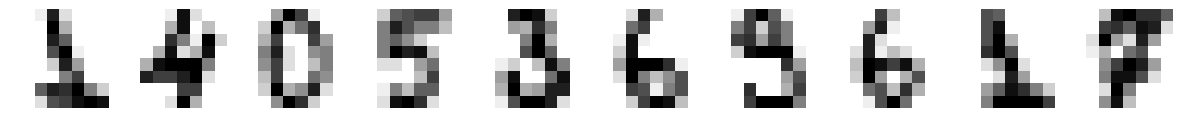

In [10]:
# visualization of fisrt 10 test samples
fig = plt.figure(figsize=(15, 5))
for i in range(1000, 1010):
    plt.subplot(1, 10, i-999)
    plt.imshow(digits.images[i], cmap='binary')
    plt.axis('off')
plt.show()

In [11]:
import pandas as pd

# confusion matrix for test data
pd.crosstab(y_test, predictions,
            rownames=['Answer'], colnames=['Predicted value'],
            margins=True)

Predicted value,0,1,2,3,4,5,6,7,8,9,All
Answer,,,,,,,,,,,
0,76,0,0,0,0,0,3,0,0,0,79
1,2,68,0,0,3,1,1,1,0,4,80
2,0,0,75,0,0,0,0,1,1,0,77
3,1,2,2,66,0,2,0,0,3,3,79
4,0,1,0,0,79,0,0,0,3,0,83
5,0,0,0,0,0,78,2,1,1,0,82
6,0,1,0,0,1,0,78,0,0,0,80
7,0,1,0,0,0,0,0,75,0,4,80
8,0,1,3,0,0,2,0,1,66,3,76


In [ ]:
# Read simpsons data
url = 'https://drive.google.com/file/d/1ATIrYvz2wOyTU4MGXvcZOfPGd0OurYfL/view?usp=sharing'
file_id = url.split('/')[-2]
download_link = 'https://drive.google.com/uc?id=' + file_id
df_simpsions = pd.read_csv(download_link)
df_simpsions

In [ ]:
from IPython.display import display

# Split feature columns and label(class) column
X = df_simpsions.drop('gender', axis=1)
display(X)
print('\n')

y = df_simpsions['gender']
display(y.to_frame())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Training
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X.values, y.values)

# Visualization
text_representation = tree.export_text(model, feature_names=X.columns.to_list())
print(text_representation)

In [ ]:
# Predict the gender of 'John Doe'
model.predict([[3, 190, 32]])